In [0]:
%fs ls /FileStore/


path name size modificationTime dbfs:/FileStore/pubmed_baseline/ pubmed_baseline/ 0 1751360273324 dbfs:/FileStore/pubmed_filtrado/ pubmed_filtrado/ 0 1751362472827 dbfs:/FileStore/pubmed_parquet/ pubmed_parquet/ 0 0

In [0]:
%fs ls /FileStore/pubmed_baseline/


path name size modificationTime dbfs:/FileStore/pubmed_baseline/pubmed25n0001.xml.gz pubmed25n0001.xml.gz 19677806 1750500093775 dbfs:/FileStore/pubmed_baseline/pubmed25n0002.xml.gz pubmed25n0002.xml.gz 17774034 1750500096161 dbfs:/FileStore/pubmed_baseline/pubmed25n0003.xml.gz pubmed25n0003.xml.gz 16443024 1750500098427 dbfs:/FileStore/pubmed_baseline/pubmed25n0004.xml.gz pubmed25n0004.xml.gz 18118733 1750500101202 dbfs:/FileStore/pubmed_baseline/pubmed25n0005.xml.gz pubmed25n0005.xml.gz 17416603 1750500103596 dbfs:/FileStore/pubmed_baseline/pubmed25n0006.xml.gz pubmed25n0006.xml.gz 20449707 1750500106166 dbfs:/FileStore/pubmed_baseline/pubmed25n0007.xml.gz pubmed25n0007.xml.gz 20547744 1750500108677 dbfs:/FileStore/pubmed_baseline/pubmed25n0008.xml.gz pubmed25n0008.xml.gz 19652303 1750500111118 dbfs:/FileStore/pubmed_baseline/pubmed25n0009.xml.gz pubmed25n0009.xml.gz 9147705 1750500113149 dbfs:/FileStore/pubmed_baseline/pubmed25n0010.xml.gz pubmed25n0010.xml.gz 12458196 1750500115356 dbfs:/FileStore/pubmed_baseline/pubmed25n0011.xml.gz pubmed25n0011.xml.gz 17390351 1750500117792 dbfs:/FileStore/pubmed_baseline/pubmed25n0012.xml.gz pubmed25n0012.xml.gz 16094710 1750500120177 dbfs:/FileStore/pubmed_baseline/pubmed25n0013.xml.gz pubmed25n0013.xml.gz 16169317 1750500093580 dbfs:/FileStore/pubmed_baseline/pubmed25n0014.xml.gz pubmed25n0014.xml.gz 16734156 1750500096407 dbfs:/FileStore/pubmed_baseline/pubmed25n0015.xml.gz pubmed25n0015.xml.gz 14435261 1750500098713 dbfs:/FileStore/pubmed_baseline/pubmed25n0016.xml.gz pubmed25n0016.xml.gz 14651353 1750500100900 dbfs:/FileStore/pubmed_baseline/pubmed25n0017.xml.gz pubmed25n0017.xml.gz 14028022 1750500103105 dbfs:/FileStore/pubmed_baseline/pubmed25n0018.xml.gz pubmed25n0018.xml.gz 13220801 1750500105396 dbfs:/FileStore/pubmed_baseline/pubmed25n0019.xml.gz pubmed25n0019.xml.gz 16123551 1750500107951 dbfs:/FileStore/pubmed_baseline/pubmed25n0020.xml.gz pubmed25n0020.xml.gz 12570422 1750500110202 dbfs:/FileStore/pubmed_baseline/pubmed25n0021.xml.gz pubmed25n0021.xml.gz 13293658 1750500112401 dbfs:/FileStore/pubmed_baseline/pubmed25n0022.xml.gz pubmed25n0022.xml.gz 13779151 1750500115360 dbfs:/FileStore/pubmed_baseline/pubmed25n0023.xml.gz pubmed25n0023.xml.gz 13547802 1750500117621 dbfs:/FileStore/pubmed_baseline/pubmed25n0024.xml.gz pubmed25n0024.xml.gz 13603941 1750500119857 dbfs:/FileStore/pubmed_baseline/pubmed25n0025.xml.gz pubmed25n0025.xml.gz 13264247 1750500093604 dbfs:/FileStore/pubmed_baseline/pubmed25n0026.xml.gz pubmed25n0026.xml.gz 15777296 1750500096427 dbfs:/FileStore/pubmed_baseline/pubmed25n0027.xml.gz pubmed25n0027.xml.gz 18192708 1750500098768 dbfs:/FileStore/pubmed_baseline/pubmed25n0028.xml.gz pubmed25n0028.xml.gz 14784063 1750500101155 dbfs:/FileStore/pubmed_baseline/pubmed25n0029.xml.gz pubmed25n0029.xml.gz 14160484 1750500103483 dbfs:/FileStore/pubmed_baseline/pubmed25n0030.xml.gz pubmed25n0030.xml.gz 13371851 1750500105879 dbfs:/FileStore/pubmed_baseline/pubmed25n0031.xml.gz pubmed25n0031.xml.gz 14324458 1750500108099 dbfs:/FileStore/pubmed_baseline/pubmed25n0032.xml.gz pubmed25n0032.xml.gz 14078304 1750500110784 dbfs:/FileStore/pubmed_baseline/pubmed25n0033.xml.gz pubmed25n0033.xml.gz 14381754 1750500113116 dbfs:/FileStore/pubmed_baseline/pubmed25n0034.xml.gz pubmed25n0034.xml.gz 11149772 1750500115374 dbfs:/FileStore/pubmed_baseline/pubmed25n0035.xml.gz pubmed25n0035.xml.gz 10047172 1750500117667 dbfs:/FileStore/pubmed_baseline/pubmed25n0036.xml.gz pubmed25n0036.xml.gz 15665398 1750500120046 dbfs:/FileStore/pubmed_baseline/pubmed25n0037.xml.gz pubmed25n0037.xml.gz 14791926 1750500093544 dbfs:/FileStore/pubmed_baseline/pubmed25n0038.xml.gz pubmed25n0038.xml.gz 14066398 1750500096014 dbfs:/FileStore/pubmed_baseline/pubmed25n0039.xml.gz pubmed25n0039.xml.gz 14894198 1750500098411 dbfs:/FileStore/pubmed_baseline/pubmed25n0040.xml.gz pubmed25n0040.xml.gz 13076028 1750500100625 dbfs:/FileStore/pubmed_baseline/pubmed25n0041.xml.gz pubmed25n0041.xml.gz 13496617 175050

In [0]:
from pyspark.sql.functions import input_file_name


files = dbutils.fs.ls("dbfs:/FileStore/pubmed_parquet/articulos_aux")

num_files = len(files)
total_size = sum(f.size for f in files)

print(f"Número de ficheros: {num_files}")
print(f"Tamaño total: {total_size/1024/1024:.2f} MB")

Número de ficheros: 322
Tamaño total: 18722.47 MB


## Filtrage de la muestra 2020- **2025**

In [0]:


from pyspark.sql.functions import col, substr
df = spark.read.parquet("/FileStore//pubmed_parquet/articulos_aux")
df.printSchema()

df_filtrado = df.filter(
    (col("pub_year").isNotNull()) &
    (col("pub_year") != '') &
    (col("pub_year").substr(1, 4) >= "2020") &
     (col("pub_year").substr(1, 4) <= "2025")
)


# Mostrar una muestra opcional
display(df_filtrado)

# Guardar en parquet
df_filtrado.write.mode("overwrite").parquet("/FileStore/pubmed_filtrado_2020_2025")
#print(df_filtrado.count())

root
 |-- pmid: string (nullable = true)
 |-- title: string (nullable = true)
 |-- pub_year: string (nullable = true)
 |-- journal: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- issn: string (nullable = true)
 |-- language: string (nullable = true)
 |-- country: string (nullable = true)
 |-- citation: string (nullable = true)
 |-- mid: string (nullable = true)
 |-- doi: string (nullable = true)
 |-- pii: string (nullable = true)
 |-- pmc: string (nullable = true)
 |-- fore: string (nullable = true)
 |-- last: string (nullable = true)
 |-- fullname: string (nullable = true)
 |-- orcid: string (nullable = true)
 |-- affiliation: string (nullable = true)
 |-- affiliation_country: string (nullable = true)
 |-- term: string (nullable = true)
 |-- major: string (nullable = true)



pmid title pub_year journal volume issn language country citation mid doi pii pmc fore last fullname orcid affiliation affiliation_country term major 27676117 Miniperc 2021 Journal of endourology 35 1557-900X eng United States J Endourol, 35, 2021 10.1089/end.2016.0259 Tarek Soliman Tarek Soliman Urology Department, Faculty of Medicine, Benha University, Benha, Egypt. Egypt Humans N 27676117 Miniperc 2021 Journal of endourology 35 1557-900X eng United States J Endourol, 35, 2021 10.1089/end.2016.0259 Tarek Soliman Tarek Soliman Urology Department, Faculty of Medicine, Benha University, Benha, Egypt. Egypt Kidney Calculi Y 27676117 Miniperc 2021 Journal of endourology 35 1557-900X eng United States J Endourol, 35, 2021 10.1089/end.2016.0259 Tarek Soliman Tarek Soliman Urology Department, Faculty of Medicine, Benha University, Benha, Egypt. Egypt Lithotripsy Y 27676117 Miniperc 2021 Journal of endourology 35 1557-900X eng United States J Endourol, 35, 2021 10.1089/end.2016.0259 Tarek Soliman Tarek Soliman Urology Department, Faculty of Medicine, Benha University, Benha, Egypt. Egypt Operative Time N 27676117 Miniperc 2021 Journal of endourology 35 1557-900X eng United States J Endourol, 35, 2021 10.1089/end.2016.0259 Tarek Soliman Tarek Soliman Urology Department, Faculty of Medicine, Benha University, Benha, Egypt. Egypt Prospective Studies N 27676117 Miniperc 2021 Journal of endourology 35 1557-900X eng United States J Endourol, 35, 2021 10.1089/end.2016.0259 Tarek Soliman Tarek Soliman Urology Department, Faculty of Medicine, Benha University, Benha, Egypt. Egypt Treatment Outcome N 27676117 Miniperc 2021 Journal of endourology 35 1557-900X eng United States J Endourol, 35, 2021 10.1089/end.2016.0259 Hammouda Sherif Hammouda Sherif Urology Department, Faculty of Medicine, Benha University, Benha, Egypt. Egypt Humans N 27676117 Miniperc 2021 Journal of endourology 35 1557-900X eng United States J Endourol, 35, 2021 10.1089/end.2016.0259 Hammouda Sherif Hammouda Sherif Urology Department, Faculty of Medicine, Benha University, Benha, Egypt. Egypt Kidney Calculi Y 27676117 Miniperc 2021 Journal of endourology 35 1557-900X eng United States J Endourol, 35, 2021 10.1089/end.2016.0259 Hammouda Sherif Hammouda Sherif Urology Department, Faculty of Medicine, Benha University, Benha, Egypt. Egypt Lithotripsy Y 27676117 Miniperc 2021 Journal of endourology 35 1557-900X eng United States J Endourol, 35, 2021 10.1089/end.2016.0259 Hammouda Sherif Hammouda Sherif Urology Department, Faculty of Medicine, Benha University, Benha, Egypt. Egypt Operative Time N 27676117 Miniperc 2021 Journal of endourology 35 1557-900X eng United States J Endourol, 35, 2021 10.1089/end.2016.0259 Hammouda Sherif Hammouda Sherif Urology Department, Faculty of Medicine, Benha University, Benha, Egypt. Egypt Prospective Studies N 27676117 Miniperc 2021 Journal of endourology 35 1557-900X eng United States J Endourol, 35, 2021 10.1089/end.2016.0259 Hammouda Sherif Hammouda Sherif Urology Department, Faculty of Medicine, Benha University, Benha, Egypt. Egypt Treatment Outcome N 27676117 Miniperc 2021 Journal of endourology 35 1557-900X eng United States J Endourol, 35, 2021 10.1089/end.2016.0259 Ahmed Sebaey Ahmed Sebaey Urology Department, Faculty of Medicine, Benha University, Benha, Egypt. Egypt Humans N 27676117 Miniperc 2021 Journal of endourology 35 1557-900X eng United States J Endourol, 35, 2021 10.1089/end.2016.0259 Ahmed Sebaey Ahmed Sebaey Urology Department, Faculty of Medicine, Benha University, Benha, Egypt. Egypt Kidney Calculi Y 27676117 Miniperc 2021 Journal of endourology 35 1557-900X eng United States J Endourol, 35, 2021 10.1089/end.2016.0259 Ahmed Sebaey Ahmed Sebaey Urology Department, Faculty of Medicine, Benha University, Benha, Egypt. Egypt Lithotripsy Y 27676117 Miniperc 2021 Journal of endourology 35 1557-900X eng United States J Endourol, 35, 2021 10.1089/end.2016.0259 Ahmed Sebaey Ahmed Sebaey Urology Department, Faculty of Medicine, Be

371220134


## EDA

In [0]:
from pyspark.sql.functions import col, explode
from pyspark.sql.types import ArrayType, StringType,StructType, StructField, StringType, IntegerType
from pyspark.sql import functions as F

# Límite de valores únicos a mostrar por columna
max_values = 20

##df = spark.read.parquet("/FileStore/pubmed_parsed_fast")
df = spark.read.parquet("/FileStore/pubmed_filtrado_2020_2025")
df.cache
df.show(5, truncate=False)

# Contar total de filas del DataFrame
total_rows = df.count()
print(f"\n📊 Total de registros (filas): {total_rows}")

# Lista de resultados
summary_data = []


df.printSchema()

for field in df.schema.fields:
    col_name = field.name
    col_type = field.dataType

    print(f"\n🔍 Columna: {col_name} - Tipo: {col_type}")

    if isinstance(col_type, ArrayType):
        element_type = col_type.elementType

        # Explota el array en elementos individuales
        exploded_df = df.select(explode(col(col_name)).alias("element"))

        if isinstance(element_type, StringType):
            # Array de strings
            count_unique = exploded_df.select("element").distinct().count()
            count_non_null = exploded_df.filter((col("element").isNotNull()) & (col("element") != "")).count()
            count_null = exploded_df.filter((col("element").isNull()) | (col("element") == "")).count()
            count_duplicates = count_non_null - count_unique

            print(f"🔸 Total únicos: {count_unique}")
            print(f"🔸 Total no nulos/no vacíos: {count_non_null}")
            print(f"🔸 Total duplicados: {count_duplicates}")
            print(f"🔸 Total nulos o vacíos: {count_null}")

            exploded_df.select("element").distinct().limit(max_values).show(truncate=False)
      

        else:
            print(f"⚠️ Tipo de elemento en array no manejado: {element_type}")
            continue

        summary_data.append((
            col_name,
            str(col_type),
            total_rows,
            count_unique,
            count_non_null,
            count_duplicates,
            count_null
        ))

    else:
        # Columna normal (string, int, etc.)
        count_unique = df.select(col(col_name)).distinct().count()

        if isinstance(col_type, StringType):
            count_non_null = df.filter((col(col_name).isNotNull()) & (col(col_name) != "")).count()
            count_null = df.filter((col(col_name).isNull()) | (col(col_name) == "")).count()
        else:
            count_non_null = df.filter(col(col_name).isNotNull()).count()
            count_null = df.filter(col(col_name).isNull()).count()

        count_duplicates = count_non_null - count_unique

        print(f"📊 Total únicos: {count_unique}")
        print(f"📊 Total no nulos/no vacíos: {count_non_null}")
        print(f"📊 Total duplicados: {count_duplicates}")
        print(f"📊 Total null: {count_null}")

        df.select(col(col_name)).distinct().limit(max_values).show(truncate=False)

        summary_data.append((
            col_name,
            str(col_type),
            total_rows,
            count_unique,
            count_non_null,
            count_duplicates,
            count_null
        ))

# Crear DataFrame resumen
summary_df = spark.createDataFrame(
    summary_data,
    ["column_name", "type", "total_records", "unique_count", "non_null_count", "duplicate_count","total_nulos" ]
)

# Mostrar resultado ordenado por número de duplicados
summary_df.orderBy("duplicate_count", ascending=False).show(n=summary_df.count(), truncate=False, vertical=True)

#summary_pd = summary_df.orderBy("duplicate_count", ascending=False).toPandas()
print(summary_pd)


# Outliers: artículos con muchos autores
print("\n🚨 Artículos con número inusualmente alto de autores (outliers):")
from pyspark.sql.functions import countDistinct

# Contar autores únicos por PMID
pmid_counts = (
    df.groupBy("pmid")
    .agg(countDistinct("fullname").alias("num_autores_unicos"))
)

# Filtrar los artículos con más de 50 autores únicos
pmids_mas_50_autores_unicos = pmid_counts.filter(pmid_counts.num_autores_unicos > 50)

pmids_mas_50_autores_unicos \
  .select("pmid", "num_autores_unicos") \
  .distinct() \
  .orderBy(col("num_autores_unicos").desc()) \
  .show(10, truncate=False)



# ------------------------------------------------------------
# 8️⃣ Registros raros: títulos sin autor
no_author = df.filter(
    (col("title").isNotNull()) &
    (col("title") != "") &
    ((col("fullname").isNull()) | (col("fullname") == ""))
)


print(f"Artículos con título pero sin fullname: {no_author.select(F.countDistinct('pmid')).collect()[0][0]}")
no_author.select("pmid", "title").show(10, truncate=False)

# ------------------------------------------------------------
# 9️⃣ Afiliaciones sin país
no_aff_country = df.filter(
    (col("affiliation").isNotNull()) &
    (col("affiliation") != "") &
    ((col("affiliation_country").isNull()) | (col("affiliation_country") == ""))
)

print(f"Registros con affiliation pero sin affiliation_country: {no_aff_country.select(F.countDistinct('affiliation')).collect()[0][0]}")
no_aff_country.select("pmid", "affiliation").distinct().show(10, truncate=False)  

# 10 Num afiliaciones por autor
aff_aut_counts = (
    df.groupBy("fullname")
    .agg(countDistinct("affiliation").alias("num_affiliation_unicos"))
)

# Filtrar los autores con más de 1000 afiliaciones únicos

aff_aut_mas_1000_aff_autor_unicos = aff_aut_counts.filter(
    col("num_affiliation_unicos") > 1000
)

# Muestra
aff_aut_mas_1000_aff_autor_unicos \
  .select("fullname", "num_affiliation_unicos") \
  .distinct() \
  .orderBy(col("num_affiliation_unicos").desc()) \
  .show(10, truncate=False)









# -------------------------------------------
# 1️⃣ Imports
# -------------------------------------------
from pyspark.sql.functions import broadcast, col, lower, trim

# -------------------------------------------
# 2️⃣ Tabla PubMed base
# -------------------------------------------
df_pubmed = spark.table("spark_catalog.default.pubmed_articulos")

# -------------------------------------------
# 3️⃣ Tabla ISO de idiomas
# -------------------------------------------
df_lang_iso = spark.table("unirdat.pubmed_db.n_language")
df_lang_iso_sel = df_lang_iso.select("PubMedCode", "ISOCode")

# -------------------------------------------
# 4️⃣ Tabla ISO de países
# -------------------------------------------
df_country_iso = spark.table("unirdat.pubmed_db.n_pais")
df_country_iso_sel = df_country_iso.select("name", "Code")

# -------------------------------------------
# 5️⃣ JOIN idiomas (normalizado)
# -------------------------------------------
df_joined = df_pubmed.join(
    broadcast(df_lang_iso_sel),
    lower(trim(df_pubmed["language"])) == lower(trim(df_lang_iso_sel["PubMedCode"])),
    how="left"
).drop("PubMedCode").withColumnRenamed("ISOCode", "language_iso")

# -------------------------------------------
# 6️⃣ JOIN país principal (normalizado)
# -------------------------------------------
df_joined = df_joined.join(
    broadcast(df_country_iso_sel),
    lower(trim(df_joined["country"])) == lower(trim(df_country_iso_sel["name"])),
    how="left"
).drop("name").withColumnRenamed("Code", "country_iso")

# -------------------------------------------
# 7️⃣ JOIN país de afiliación (normalizado)
# -------------------------------------------


# -------------------------------------------
# 8️⃣ Añade columnas de validación (True/False)
# -------------------------------------------
df_validated = df_joined \
    .withColumn("language_is_iso", col("language_iso").isNotNull()) \
    .withColumn("country_is_iso", col("country_iso").isNotNull()) \
 

# -------------------------------------------
# 9️⃣ Métricas de validación
# -------------------------------------------
num_invalid_lang = df_validated.filter(~col("language_is_iso")).count()
num_invalid_country = df_validated.filter(~col("country_is_iso")).count()






# -------------------------------------------
# 🔟 Muestras de registros problemáticos
# -------------------------------------------

print(f"🔍 Registros con language NO ISO: {num_invalid_lang}")
df_validated.filter(~col("language_is_iso")).select("language").distinct().show(100, truncate=False)


print(f"🔍 Registros con country NO ISO: {num_invalid_country}")
df_validated.filter(~col("country_is_iso")).select("country").distinct().show(100, truncate=False)

df_validated.count()




+--------+------------------------------------------------------------------------------------------------------------------------------+--------+----------------------------------------+------+---------+--------+-------------+----------------------------------+---+-------------------------+---------------------+---+-----+-----+-----------+-----+----------------------------------------------------------------------------------------------------------+-------------------+------------+-----+
|pmid    |title                                                                                                                         |pub_year|journal                                 |volume|issn     |language|country      |citation                          |mid|doi                      |pii                  |pmc|fore |last |fullname   |orcid|affiliation                                                                                               |affiliation_country|term        |major|
+--------+

4912248

In [0]:
df_validated.show(4) country_is_iso, pmid, country

+--------+--------------------+-------------+--------+--------------------+------------+------------+-----------+---------------+--------------+
|    pmid|             journal|      country|language|               title|pub_year_for|language_iso|country_iso|language_is_iso|country_is_iso|
+--------+--------------------+-------------+--------+--------------------+------------+------------+-----------+---------------+--------------+
|35102770|pediatric and dev...|united states|     eng|the extrauterine ...|        2022|          en|         US|           true|          true|
|35102873|studies in health...|  netherlands|     eng|dr. lindberg: an ...|        2022|          en|         NL|           true|          true|
|35103377|angewandte chemie...|      germany|     eng|leveraging electr...|        2022|          en|         DE|           true|          true|
|35103591|               elife|      england|     eng|exsted microscopy...|        2022|          en|       NULL|           true| 

7361430
2762118
Total fullname únicos: 7361430
Con ORCID: 7361430 (100.0%)
Sin ORCID: 4599312 (62.48%)


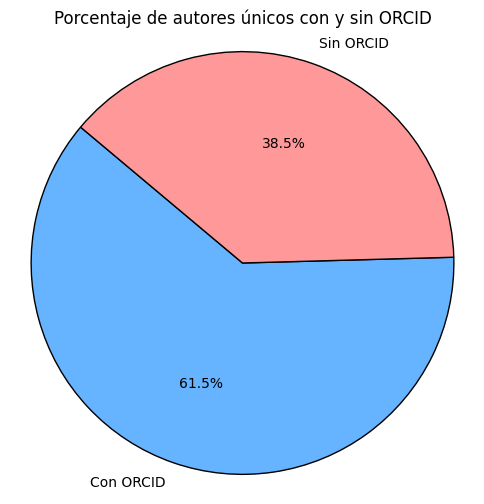

In [0]:
# ----------------------------------------------------------
# Imports
# ----------------------------------------------------------
from pyspark.sql.functions import when, countDistinct
import matplotlib.pyplot as plt

# ----------------------------------------------------------
# 1️⃣ Suponemos DataFrame: df_autores
# ----------------------------------------------------------
# Ejemplo columnas: fullname, orcid_final

# ----------------------------------------------------------
# 2️⃣ ¿Cuántos fullname únicos hay?
# ----------------------------------------------------------


df.createOrReplaceTempView("tmp_autores")

query = """
SELECT 
    COUNT( distinct fullname) AS total_regs,
    COUNT( distinct CASE WHEN orcid IS NOT NULL THEN orcid END) AS total_orcids
FROM 
    tmp_autores
"""
total_fullnames_df = spark.sql(query)

# Opción clara:
total_fullnames = total_fullnames_df.collect()[0][0]
total_orcdi = total_fullnames_df.collect()[0][1]
print(total_fullnames)
print(total_orcdi)





# Los que NO tienen ORCID = Total - Con ORCID
fullnames_sin_orcid = total_fullnames - total_orcdi 

# ----------------------------------------------------------
# 4️⃣ Calculamos porcentajes
# ----------------------------------------------------------
pct_con = round(fullnames_con_orcid / total_fullnames * 100, 2)
pct_sin = round(fullnames_sin_orcid / total_fullnames * 100, 2)

print(f"Total fullname únicos: {total_fullnames}")


# ----------------------------------------------------------
# 5️⃣ Pie chart en Matplotlib
# ----------------------------------------------------------
labels = ["Con ORCID", "Sin ORCID"]
sizes = [fullnames_con_orcid, fullnames_sin_orcid]
colors = ["#66b3ff", "#ff9999"]

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    wedgeprops={"edgecolor": "black"}
)
plt.title("Porcentaje de autores con y sin ORCID")
plt.axis("equal")
plt.show()



+---------+----------------------+
| fullname|num_affiliation_unicos|
+---------+----------------------+
| Wei Wang|                  7614|
|Wei Zhang|                  7024|
|Jing Wang|                  6692|
| Yang Liu|                  6056|
|  Jing Li|                  5708|
| Yan Wang|                  5589|
|   Yan Li|                  5465|
| Yu Zhang|                  5442|
|Yan Zhang|                  5198|
|   Wei Li|                  5187|
+---------+----------------------+



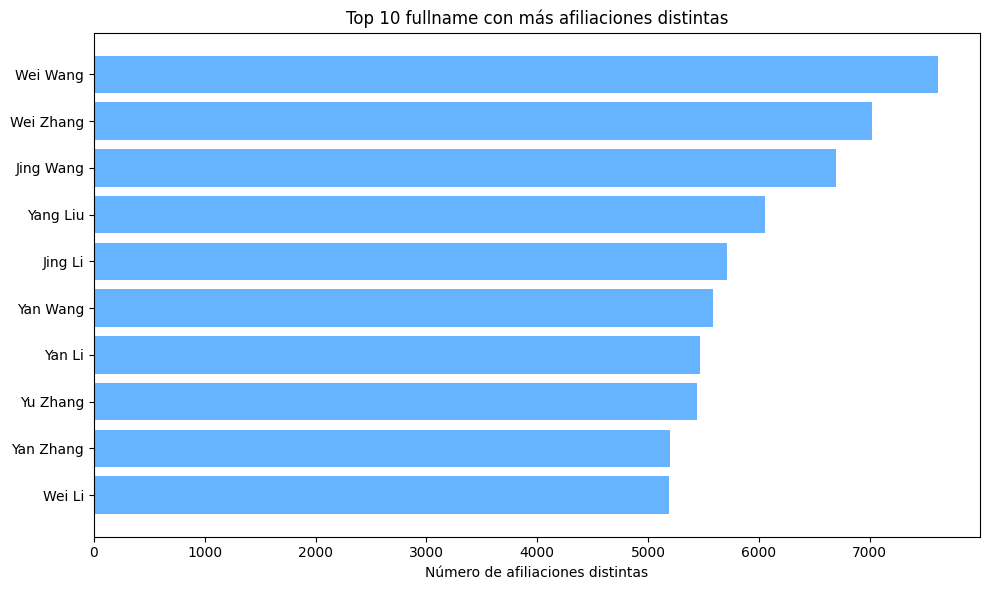

In [0]:
from pyspark.sql.functions import countDistinct, col
import matplotlib.pyplot as plt

# ---------------------------------------------
# 1️⃣ Contar cuántas afiliaciones distintas tiene cada fullname
# ---------------------------------------------


query = """
SELECT fullname,
    COUNT( distinct affiliation) AS num_affiliation_unicos
FROM 
    tmp_autores
group by fullname  
order by num_affiliation_unicos desc
limit 10
"""

df_aff_counts = spark.sql(query)

# ---------------------------------------------
# 2️⃣ Ordenar y coger el TOP 10
# ---------------------------------------------
df_top10 = df_aff_counts.orderBy(col("num_affiliation_unicos").desc()).limit(10)

df_top10.show()
pdf_top10 = df_top10.toPandas()
plt.figure(figsize=(10, 6))

# Orden inverso para mejor visualización
pdf_top10 = pdf_top10.sort_values(by="num_affiliation_unicos", ascending=True)

plt.barh(
    pdf_top10["fullname"],
    pdf_top10["num_affiliation_unicos"],
    color="#66b3ff"
)

plt.xlabel("Número de afiliaciones")
plt.title("Top 10 autores con más afiliaciones")
plt.tight_layout()
plt.show()

In [0]:
df_validated.show(3)

+--------+--------------------+-------------+--------+--------------------+------------+------------+-----------+---------------+--------------+
|    pmid|             journal|      country|language|               title|pub_year_for|language_iso|country_iso|language_is_iso|country_is_iso|
+--------+--------------------+-------------+--------+--------------------+------------+------------+-----------+---------------+--------------+
|35102770|pediatric and dev...|united states|     eng|the extrauterine ...|        2022|          en|         US|           true|          true|
|35102873|studies in health...|  netherlands|     eng|dr. lindberg: an ...|        2022|          en|         NL|           true|          true|
|35103377|angewandte chemie...|      germany|     eng|leveraging electr...|        2022|          en|         DE|           true|          true|
+--------+--------------------+-------------+--------+--------------------+------------+------------+-----------+---------------+-

+--------------------+------------+-------------+
|             country|pub_year_for|num_articulos|
+--------------------+------------+-------------+
|china (republic :...|        2020|          694|
|china (republic :...|        2021|          758|
|china (republic :...|        2022|          756|
|china (republic :...|        2023|          738|
|china (republic :...|        2024|          722|
|             england|        2020|       266453|
|             england|        2021|       292197|
|             england|        2022|       288969|
|             england|        2023|       265246|
|             england|        2024|       286593|
|             england|        2025|        12822|
|  georgia (republic)|        2020|          362|
|  georgia (republic)|        2021|          359|
|  georgia (republic)|        2022|          220|
|  georgia (republic)|        2023|          320|
|  georgia (republic)|        2024|          297|
|                iran|        2020|          808|


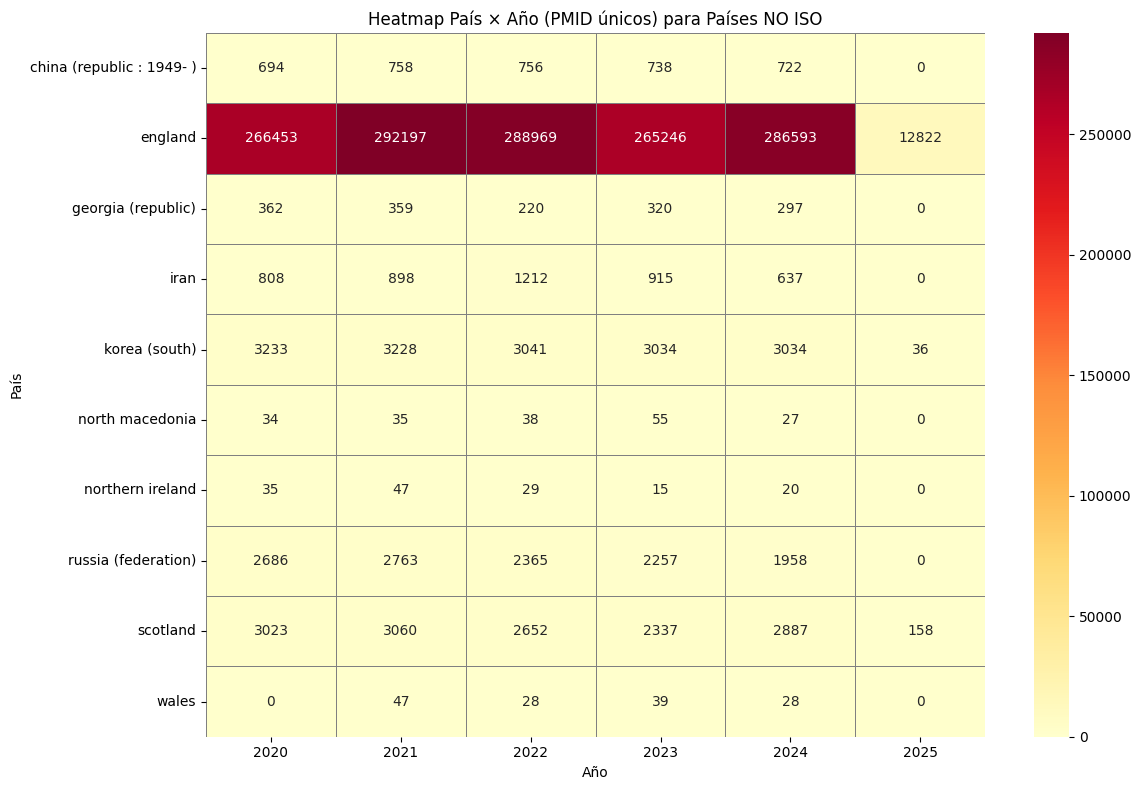

In [0]:
from pyspark.sql.functions import col, countDistinct

# Filtra países no ISO
df_no_iso = df_validated.filter(col("country_is_iso") == False)
df_heatmap = df_no_iso.groupBy("country", "pub_year_for").agg(
    countDistinct("pmid").alias("num_articulos")
).orderBy("country", "pub_year_for")

df_heatmap.show()

# A Pandas
pdf_heatmap = df_heatmap.toPandas()

# Pivot: country = filas, year = columnas
pdf_pivot = pdf_heatmap.pivot(
    index="country",
    columns="pub_year_for",
    values="num_articulos"
).fillna(0).astype(int)

print(pdf_pivot)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

sns.heatmap(
    pdf_pivot,
    cmap="YlOrRd",
    annot=True,
    fmt="d",
    linewidths=0.5,
    linecolor="gray"
)

plt.title("Heatmap País × Año (PMID únicos) para Países NO ISO")
plt.xlabel("Año")
plt.ylabel("País")
plt.tight_layout()
plt.show()



In [0]:
%pip install openpyxl seaborn

In [0]:
from pyspark.sql.functions import col, explode, trim, lower, countDistinct

# Explota el array de autores
authors = df.select(
    col("pmid"),col("fullname"), col("affiliation"), col("title")
)

# Limpia afiliación (puede haber nulos, mayúsculas, espacios)
authors = authors.withColumn(
    "affiliation_clean",
    trim(lower(col("affiliation")))
)

# Cuenta afiliaciones únicas por pmid (o tu ID)

affiliations_per_article = authors.groupBy("pmid").agg(
    countDistinct("affiliation_clean").alias("num_affiliations"),
    countDistinct("fullname").alias("num_autor")
)

# Une de nuevo al dataframe principal
df_enriched = df.join(affiliations_per_article, on="pmid", how="left")



# 1️⃣ Instalar dependencias (solo una vez)
%pip install openpyxl seaborn

# 2️⃣ Imports
from pyspark.sql.functions import col, size, split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
import os

# 3️⃣ Crear columnas numéricas representativas
df_corr = (
    df_enriched.withColumn("num_autor", col("num_autor"))
      .withColumn("title_word_count", size(split(col("title"), " ")))
      .withColumn("year", col("pub_year").cast("int"))
      .withColumn("num_affiliations", col("num_affiliations").cast("int"))
)



# Opcional: Si tienes 'affiliations' como array
##if "affiliations" in df.columns:
##    df_corr = df_corr.withColumn("num_affiliations", size(col("affiliations")))
##else:
##    df_corr = df_corr.withColumn("num_affiliations", col("num_authors"))  # Ejemplo placeholder

# 4️⃣ Pasar a Pandas (usa muestra si es grande)
df_corr_pd = df_corr.select(
    "num_autor", "title_word_count", "num_affiliations", "year"
).dropna().limit(50000).toPandas()

# 5️⃣ Matriz de correlación
corr_matrix = df_corr_pd.corr()
print("Matriz de correlación:\n", corr_matrix)

# 6️⃣ Visualizar con mapa de calor
sns.set(font_scale=1.2)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

# 7️⃣ Guardar matriz en Excel
local_xlsx = "/tmp/corr_matrix.xlsx"
corr_matrix.to_excel(local_xlsx, engine="openpyxl")

# Copiar a DBFS para descargar
os.makedirs("/dbfs/FileStore", exist_ok=True)
dbfs_xlsx = "/dbfs/FileStore/corr_matrix.xlsx"
shutil.copy(local_xlsx, dbfs_xlsx)

print(f"✅ Archivo disponible: {dbfs_xlsx}")


In [0]:
%sql
--252393045

--select count(1) from pubmed_filtrado_part
--where pmid =38641440 and country='United States'
select distinct country from 
(
select  trim(lower ( country)) country from pubmed_filtrado_part
minus
select  trim(lower ( name))  country from unirdat.pubmed_db.n_pais)
--where trim(lower ( name))  <>  trim(lower ( country)) 
--limit 2


---select  * from unirdat.pubmed_db.n_pais



country north macedonia northern ireland iran georgia (republic) russia (federation) scotland korea (south) china (republic : 1949- ) england wales

In [0]:

## Verificacion des pais ISO

from pyspark.sql.functions import broadcast, col, lower, trim

# 1️⃣ Cargar DataFrame principal
df = spark.read.parquet("/FileStore/pubmed_filtrado_2020_2025")
# lo tengo en cache

# 2️⃣ Cargar tabla de países ISO
df_iso = spark.table("unirdat.pubmed_db.n_pais")
df_iso_sel = df_iso.selectExpr("name AS iso_country", "Code")

# 3️⃣ Validar `country`
df_validated = df.join(
    broadcast(df_iso_sel),
    lower(trim(df["country"])) == lower(trim(df_iso_sel["iso_country"])),
    how="left"
).withColumn(
    "country_is_iso",
    col("iso_country").isNotNull().cast("boolean")
)

df_invalid_articulo = df_validated.filter(
    (~col("country_is_iso")) 
)
num_descartes_country_art = df_invalid_articulo.count()
print(f"Número de registros con country  NO válidos (no ISO): {num_descartes_country_art }")


# 4️⃣ Validar `affiliation_country`
df_validated_aff = df.join(
    broadcast(df_iso_sel),
    lower(trim(df["affiliation_country"])) == lower(trim(df_iso_sel["iso_country"])),
    how="left"
).withColumn(
    "affiliation_country_is_iso",
    col("iso_country").isNotNull().cast("boolean")
)

df_invalid_affiation = df_validated_aff.filter(
    (~col("affiliation_country_is_iso")) 
)

num_descartes_country_aff = df_invalid_affiation.count()
print(f"Número de registros con  affiliation_country NO válidos (no ISO): {num_descartes_country_aff}")




# 1️⃣ Cargar tabla ISO de idiomas
df_lang_iso = spark.table("unirdat.pubmed_db.n_language")

# 2️⃣ Seleccionar y renombrar columnas si hace falta
df_lang_iso_sel = df_lang_iso.selectExpr("ISOCode", "PubMedCode")

# 3️⃣ Hacer JOIN con normalización: minúsculas y trim
df_validated = df.join(
    broadcast(df_lang_iso_sel),
    lower(trim(df["language"])) == lower(trim(df_lang_iso_sel["ISOCode"])),
    how="left"
).withColumn(
    "ISOCode",
    col("ISOCode").isNotNull().cast("boolean")
)

# 4️⃣ Ver cuántos NO coinciden
num_no_iso = df_validated.filter(~col("ISOCode")).count()

print(f"Número de registros con language NO ISO: {num_no_iso}")




Número de registros con country  NO válidos (no ISO): 118827089
Número de registros con  affiliation_country NO válidos (no ISO): 108587952
Número de registros con language NO ISO: 371220134


In [0]:
%pip install python-docx

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
%pip install python-docx

In [0]:
dbutils.library.restartPython()

In [0]:
%pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/250.9 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 8.1 MB/s eta 0:00:00
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
dbutils.library.restartPython()

In [0]:
summary_pd = summary_df.orderBy("duplicate_count", ascending=False).toPandas()


import pandas as pd
import shutil
import os


local_path = "/tmp/summary_report.xlsx"
dbfs_dir = "/dbfs/FileStore"
dbfs_path = f"{dbfs_dir}/summary_report.xlsx"

# Crear la carpeta si no existe
os.makedirs(dbfs_dir, exist_ok=True)

# Asumiendo summary_pd ya está creado
local_path = "/tmp/summary_report.xlsx"
summary_pd.to_excel(local_path, index=False, engine='openpyxl')

os.makedirs("/dbfs/FileStore", exist_ok=True)
dbfs_path = "/dbfs/FileStore/summary_report.xlsx"
shutil.copy(local_path, dbfs_path)

print(f"Archivo guardado en DBFS: {dbfs_path}")



#https://3132215626649366.6.gcp.databricks.com/files/summary_report.xlsx

Archivo guardado en DBFS: /dbfs/FileStore/summary_report.xlsx


In [0]:
from pyspark.sql.functions import col, explode, trim, lower, countDistinct

# Explota el array de autores
authors = df.select(
    col("pmid"),col("fullname"), col("affiliation"), col("title")
)

# Limpia afiliación (puede haber nulos, mayúsculas, espacios)
authors = authors.withColumn(
    "affiliation_clean",
    trim(lower(col("affiliation")))
)

# Cuenta afiliaciones únicas por pmid (o tu ID)

affiliations_per_article = authors.groupBy("pmid").agg(
    countDistinct("affiliation_clean").alias("num_affiliations"),
    countDistinct("fullname").alias("num_autor")
)

# Une de nuevo al dataframe principal
df_enriched = df.join(affiliations_per_article, on="pmid", how="left")


df_enriched.show(10)

+--------+--------------------+--------+--------------------+------+---------+--------+-------------+--------------------+---+--------------------+--------------------+---+--------+---------+-----------------+-----+--------------------+-------------------+----------------+-----+----------------+---------+
|    pmid|               title|pub_year|             journal|volume|     issn|language|      country|            citation|mid|                 doi|                 pii|pmc|    fore|     last|         fullname|orcid|         affiliation|affiliation_country|            term|major|num_affiliations|num_autor|
+--------+--------------------+--------+--------------------+------+---------+--------+-------------+--------------------+---+--------------------+--------------------+---+--------+---------+-----------------+-----+--------------------+-------------------+----------------+-----+----------------+---------+
|30625405|Primary Peduncula...|    2020|Clinical gastroen...|    18|1542-7714| 

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.
Matriz de correlación:
                   num_autor  title_word_count  num_affiliations      year
num_autor          1.000000          0.044548          0.710634 -0.023178
title_word_count   0.044548          1.000000          0.110687  0.011010
num_affiliations   0.710634          0.110687          1.000000  0.010207
year              -0.023178          0.011010          0.010207  1.000000


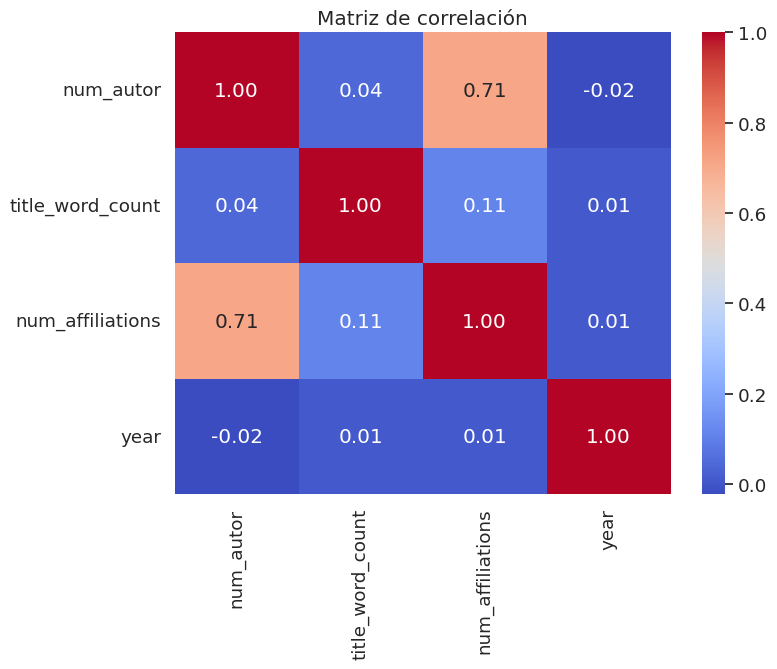

✅ Archivo disponible: /dbfs/FileStore/corr_matrix.xlsx


In [0]:
# 1️⃣ Instalar dependencias (solo una vez)
%pip install openpyxl seaborn

# 2️⃣ Imports
from pyspark.sql.functions import col, size, split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
import os

# 3️⃣ Crear columnas numéricas representativas
df_corr = (
    df_enriched.withColumn("num_autor", col("num_autor"))
      .withColumn("title_word_count", size(split(col("title"), " ")))
      .withColumn("year", col("pub_year").cast("int"))
      .withColumn("num_affiliations", col("num_affiliations").cast("int"))
)



# Opcional: Si tienes 'affiliations' como array
##if "affiliations" in df.columns:
##    df_corr = df_corr.withColumn("num_affiliations", size(col("affiliations")))
##else:
##    df_corr = df_corr.withColumn("num_affiliations", col("num_authors"))  # Ejemplo placeholder

# 4️⃣ Pasar a Pandas (usa muestra si es grande)
df_corr_pd = df_corr.select(
    "num_autor", "title_word_count", "num_affiliations", "year"
).dropna().limit(50000).toPandas()

# 5️⃣ Matriz de correlación
corr_matrix = df_corr_pd.corr()
print("Matriz de correlación:\n", corr_matrix)

# 6️⃣ Visualizar con mapa de calor
sns.set(font_scale=1.2)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

# 7️⃣ Guardar matriz en Excel
local_xlsx = "/tmp/corr_matrix.xlsx"
corr_matrix.to_excel(local_xlsx, engine="openpyxl")

# Copiar a DBFS para descargar
os.makedirs("/dbfs/FileStore", exist_ok=True)
dbfs_xlsx = "/dbfs/FileStore/corr_matrix.xlsx"
shutil.copy(local_xlsx, dbfs_xlsx)

print(f"✅ Archivo disponible: {dbfs_xlsx}")


In [0]:
%pip install matplotlib seaborn pandas